In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Goal:**

Develop an object recognition  model .The objective is to train a model that will be able to identify relevant Elements in a webpage.

**Objective:**

Implement a computer vision architecture to perform element detection and identification.

The model should be able to identify elements like Breadcrumb, checkbox, container, dropdown Forms, buttons,logo images,Navigation dots, text, links, input fields, radio, modal.

Model should be able to create a bounding box around each element and tag it with the desired element name.
Use the above mentioned elements' names as tags.


#Getting the datasets

The datasets are taken are from website https://roboflow.com/

In [ ]:
!unzip '/content/drive/MyDrive/computer vision/Website Screenshots.v1-raw.yolov5pytorch.zip' -d '/content/drive/MyDrive/computer vision/unzipped_dataset_1'

Archive:  /content/drive/MyDrive/computer vision/Website Screenshots.v1-raw.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_1/README.dataset.txt  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_1/README.roboflow.txt  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_1/data.yaml  
   creating: /content/drive/MyDrive/computer vision/unzipped_dataset_1/test/
   creating: /content/drive/MyDrive/computer vision/unzipped_dataset_1/test/images/
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_1/test/images/addons_mozilla_org_png.rf.8pWFwr9ZblJ92BQghXBW.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_1/test/images/addons_mozilla_org_png.rf.ec9a8e78cd5c0e6ab255f50c408caecf.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_1/test/images/adf_ly_png.rf.490b629d732bbf70e8e1d3720f440c06.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzip

In [ ]:
!unzip '/content/drive/MyDrive/computer vision/ui-cing.v26i.yolov5pytorch (1).zip' -d '/content/drive/MyDrive/computer vision/unzipped_dataset_2'

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images/cf63a298-ba37-4b19-935d-8c78753f69b9_png.rf.6e304bbc816771020c7282ae342196a9.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images/cf84defb-db2d-4db1-842f-866c05cc7eaa_png_jpg.rf.b35dada647fd2fbb9f4cc70c1b19228c.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images/cf859d4d-4062-44bc-94e5-bfb684367d3a_png_jpg.rf.12d34f8d76082c374063aa1945124964.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images/cf96bd61-93d7-4bef-b441-71f0649756fa_png_jpg.rf.d99658608698731b781b95248625124f.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images/cf9b7ae7-7a8f-455f-9ab0-dde14eed1ac0_png_jpg.rf.5fe2e3b571a4ae0514097893d7545e93.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images/cf9dec47-e041-

In [ ]:
!unzip '/content/drive/MyDrive/computer vision/webpages.v2i.yolov5pytorch.zip' -d '/content/drive/MyDrive/computer vision/unzipped_dataset_3'

Archive:  /content/drive/MyDrive/computer vision/webpages.v2i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/README.dataset.txt  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/README.roboflow.txt  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/data.yaml  
   creating: /content/drive/MyDrive/computer vision/unzipped_dataset_3/test/
   creating: /content/drive/MyDrive/computer vision/unzipped_dataset_3/test/images/
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/test/images/116_png.rf.8ebda24e239103d3548b615b9ce685c6.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/test/images/13_png.rf.4df1544f96e263f575320800e48489c3.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/test/images/143_png.rf.c2812be90765e95a5101a4be7291aac7.jpg  
 extracting: /content/drive/MyDrive/computer vision/unzipped_dataset_3/test/images/207_png.rf

##Combining the datsets

In [ ]:
import shutil
import os

# Function to copy a specific number of images and labels with error handling
def copy_subset_with_error_handling(src_images_dir, src_labels_dir, dst_images_dir, dst_labels_dir, num_images):
    # Create the destination subdirectories if they don't exist
    os.makedirs(dst_images_dir, exist_ok=True)
    os.makedirs(dst_labels_dir, exist_ok=True)

    copied_images_count = 0
    missing_labels = []

    # Copy the specified number of images and labels
    for i, filename in enumerate(sorted(os.listdir(src_images_dir))):
        if copied_images_count >= num_images:  # Stop after num_images
            break
        src_image_path = os.path.join(src_images_dir, filename)
        dst_image_path = os.path.join(dst_images_dir, filename)
        label_filename = os.path.splitext(filename)[0] + '.txt'
        src_label_path = os.path.join(src_labels_dir, label_filename)
        dst_label_path = os.path.join(dst_labels_dir, label_filename)

        # Check if the label file exists before copying
        if os.path.isfile(src_label_path):
            # Copy image
            shutil.copy(src_image_path, dst_image_path)
            # Copy corresponding label file
            shutil.copy(src_label_path, dst_label_path)
            copied_images_count += 1
        else:
            # Record the missing label file
            missing_labels.append(label_filename)

    return missing_labels

# Define the source directories for the datasets
# ... (same as your provided code for defining source directories)
# Define the source directories for the first dataset
src1_train_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_1/train/images'
src1_train_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_1/train/labels'
src1_val_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_1/valid/images'
src1_val_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_1/valid/labels'
src1_test_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_1/test/images'
src1_test_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_1/test/labels'

# Define the source directories for the second dataset
src2_train_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_2/train/images'
src2_train_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_2/train/labels'
src2_val_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_2/valid/images'
src2_val_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_2/valid/labels'
src2_test_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_2/test/images'
src2_test_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_2/test/labels'

# Define the source directories for the third dataset
src3_train_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_3/train/images'
src3_train_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_3/train/labels'
src3_val_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_3/valid/images'
src3_val_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_3/valid/labels'
src3_test_images_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_3/test/images'
src3_test_labels_dir = '/content/drive/MyDrive/computer vision/unzipped_dataset_3/test/labels'
# Define the destination directories
# ... (same as your provided code for defining destination directories)
# Define the destination directories
dst_train_images_dir = '/content/drive/MyDrive/computer vision/combined_dataset/train/images'
dst_train_labels_dir = '/content/drive/MyDrive/computer vision/combined_dataset/train/labels'
dst_val_images_dir = '/content/drive/MyDrive/computer vision/combined_dataset/valid/images'
dst_val_labels_dir = '/content/drive/MyDrive/computer vision/combined_dataset/valid/labels'
dst_test_images_dir = '/content/drive/MyDrive/computer vision/combined_dataset/test/images'
dst_test_labels_dir = '/content/drive/MyDrive/computer vision/combined_dataset/test/labels'
# Copy images and labels from the first dataset with error handling
missing_labels_1 = copy_subset_with_error_handling(src1_train_images_dir, src1_train_labels_dir, dst_train_images_dir, dst_train_labels_dir, 900)
missing_labels_1 += copy_subset_with_error_handling(src1_val_images_dir, src1_val_labels_dir, dst_val_images_dir, dst_val_labels_dir, 200)
missing_labels_1 += copy_subset_with_error_handling(src1_test_images_dir, src1_test_labels_dir, dst_test_images_dir, dst_test_labels_dir, 300)

# Copy images and labels from the second dataset with error handling
missing_labels_2 = copy_subset_with_error_handling(src2_train_images_dir, src2_train_labels_dir, dst_train_images_dir, dst_train_labels_dir, 1200)
missing_labels_2 += copy_subset_with_error_handling(src2_val_images_dir, src2_val_labels_dir, dst_val_images_dir, dst_val_labels_dir, 30 )
missing_labels_2 += copy_subset_with_error_handling(src2_test_images_dir, src2_test_labels_dir, dst_test_images_dir, dst_test_labels_dir, 250)

# Copy images and labels from the third dataset with error handling
# ... (use the copy_subset_with_error_handling function for the third dataset as well)
missing_labels_3 = copy_subset_with_error_handling(src3_train_images_dir, src3_train_labels_dir, dst_train_images_dir, dst_train_labels_dir, len(os.listdir(src3_train_images_dir)))
missing_labels_3 += copy_subset_with_error_handling(src3_val_images_dir, src3_val_labels_dir, dst_val_images_dir, dst_val_labels_dir, len(os.listdir(src3_val_images_dir)))
missing_labels_3 += copy_subset_with_error_handling(src3_test_images_dir, src3_test_labels_dir, dst_test_images_dir, dst_test_labels_dir, len(os.listdir(src3_test_images_dir)))
# Print out any missing label files
if missing_labels_1 or missing_labels_2:
    print("The following label files are missing:")
    for label in missing_labels_1 + missing_labels_2:
        print(label)
else:
    print("All label files were found and copied successfully.")


All label files were found and copied successfully.


In [ ]:
import os

# Define the directories
train_images_dir = '/content/drive/MyDrive/computer vision/combined_dataset/train/images'
val_images_dir = '/content/drive/MyDrive/computer vision/combined_dataset/valid/images'
test_images_dir = '/content/drive/MyDrive/computer vision/combined_dataset/test/images'

# Function to count images
def count_images(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Print the number of images in each directory
print(f"Number of training images: {count_images(train_images_dir)}")
print(f"Number of validation images: {count_images(val_images_dir)}")
print(f"Number of testing images: {count_images(test_images_dir)}")

Number of training images: 2260
Number of validation images: 274
Number of testing images: 513


In [ ]:
# Define the content of the data.yaml file
data_yaml_content = """train: /content/drive/MyDrive/computer vision/combined_dataset/train/images
val: /content/drive/MyDrive/computer vision/combined_dataset/valid/images
test: /content/drive/MyDrive/computer vision/combined_dataset/test/images

nc: 18
names: [
    'button', 'checkbox', 'dropdown', 'icon', 'input',
    'label', 'radio', 'slider', 'switch', 'table',
    'field', 'heading', 'iframe', 'link', 'text',
    'Cookie', 'Logo', 'Navigation'
]



# Specify the path where the data.yaml file will be created
yaml_file_path = '/content/drive/MyDrive/computer vision/combined_dataset/data.yaml'

# Write the content to the data.yaml file
with open(yaml_file_path, 'w') as file:
    file.write(data_yaml_content)

print(f'data.yaml file created at {yaml_file_path}')


data.yaml file created at /content/drive/MyDrive/computer vision/combined_dataset/data.yaml


#Getting the yolov5 model

In [2]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

# Navigate to the YOLOv5 directory
%cd yolov5

# Install the required dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16094, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16094 (delta 0), reused 4 (delta 0), pack-reused 16089
Receiving objects: 100% (16094/16094), 14.82 MiB | 25.30 MiB/s, done.
Resolving deltas: 100% (11023/11023), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

Count the total images found in each folder

#Train the model

In [ ]:
!python train.py --img 640 --batch 32 --epochs 150 --data '/content/drive/MyDrive/computer vision/combined_dataset/data.yaml' --weights 'yolov5s.pt' --cache


2023-12-12 07:25:59.915564: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 07:25:59.915634: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 07:25:59.915681: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/computer vision/combined_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fa

In [ ]:
!python val.py --weights '/content/yolov5/runs/train/exp3/weights/best.pt' --data '/content/drive/MyDrive/computer vision/combined_dataset/data.yaml' --img 640 --iou 0.65 --half


val: data=/content/drive/MyDrive/computer vision/combined_dataset/data.yaml, weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/drive/MyDrive/computer vision/combined_dataset/valid/labels.cache... 274 images, 0 backgrounds, 0 corrupt: 100% 274/274 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/computer vision/combined_dataset/valid/images/bandsintown_com_png.rf.I19VlDFncZ0RifJhmfEU.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/computer vision/combined_dataset/valid

In [ ]:
# Run inference with the trained model
!python detect.py --weights '/content/yolov5/runs/train/exp3/weights/best.pt' --img 640 --conf 0.4 --source '/content/drive/MyDrive/computer vision/combined_dataset/test/images'


detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/computer vision/combined_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/513 /content/drive/MyDrive/computer vision/combined_dataset/test/images/00c06793-d2d5-486a-a7a4-5d19ea2a8cb4_png_jpg.rf.6b71df7bd9fea759b1085d00062653f7.jpg: 640x640 1 checkbox, 11.7ms
image 2/513 /content/drive/MyDrive/computer vision/combined_dataset/test/

Testing our model for images

In [18]:
!python detect.py --weights '/content/best_all_time.pt' --img 640 --conf 0.4 --source '/content/Screenshot (1325).png'


detect: weights=['/content/best_all_time.pt'], source=/content/Screenshot (1325).png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Screenshot (1325).png: 640x640 4 buttons, 7 fields, 5 images, 4 texts, 371.4ms
Speed: 3.4ms pre-process, 371.4ms inference, 30.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [23]:
!ls '/content/yolov5/runs/detect'


exp  exp2


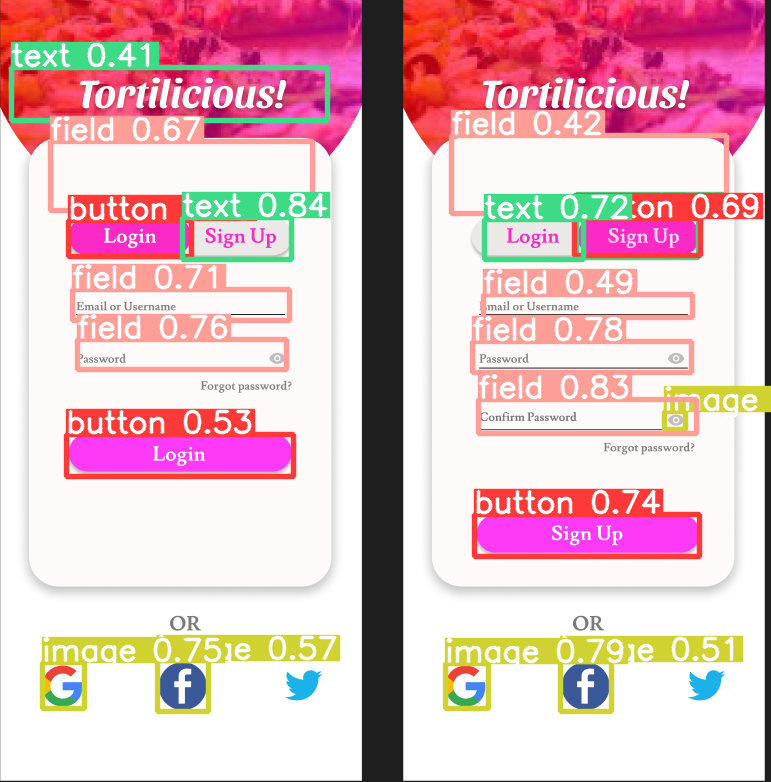

In [21]:
import glob
from IPython.display import Image, display

# Get the list of output images
output_images = glob.glob('/content/yolov5/runs/detect/exp/*.png')

# Display each detected image
for img_path in output_images:
    display(Image(filename=img_path))


In [22]:
!python detect.py --weights '/content/best_all_time.pt' --img 640 --conf 0.4 --source '/content/image.png'


detect: weights=['/content/best_all_time.pt'], source=/content/image.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/image.png: 640x320 1 field, 8 images, 2 links, 2 texts, 192.0ms
Speed: 2.4ms pre-process, 192.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


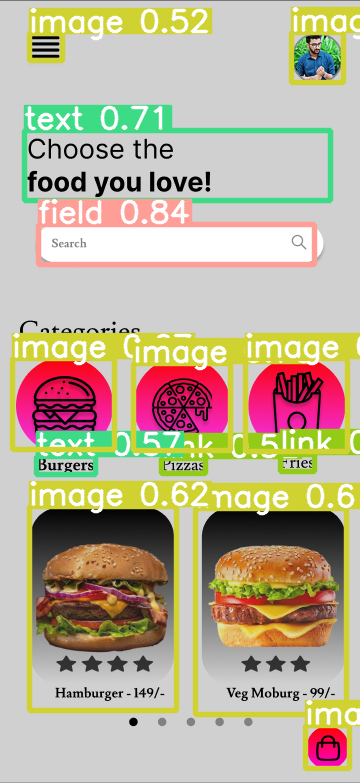

In [24]:
import glob
from IPython.display import Image, display

# Get the list of output images
output_images = glob.glob('/content/yolov5/runs/detect/exp2/*.png')

# Display each detected image
for img_path in output_images:
    display(Image(filename=img_path))
